# Напоминалка про VK API

In [1]:
import urllib.request
req = urllib.request.Request('https://api.vk.com/method/wall.get?domain=librarius') 
response = urllib.request.urlopen(req)
result = response.read().decode('utf-8')

In [2]:
import json
data = json.loads(result) 
data

{'response': [241,
  {'comments': {'count': 0},
   'copy_owner_id': 6402036,
   'copy_post_date': 1491990780,
   'copy_post_id': 4871,
   'copy_post_type': 'post',
   'copy_text': 'Дорогие друзья!<br>Очень прошу Вас, откликнитесь. К сожалению, здоровье не позволяет мне сдавать кровь, и это очень, очень плохо, что не могу помочь такому человеку.<br>PS Нужен паспорт, сказать - в отделение реанимации интенсивной терапии , хирургическое отделение. Для Данелии Смоляковой. Утром до 11.30',
   'date': 1491991958,
   'from_id': 20113344,
   'id': 924,
   'likes': {'count': 8},
   'post_type': 'copy',
   'reposts': {'count': 7},
   'text': 'Ребята, огромная беда! Пожалуйста, помогите. <br><br>Сегодня ночью на переходе [id3925796|Dana Smoliakova] сбила машина. Cейчас Дана в реанимации на искусственной вентиляции лёгких в институте Склифасовского.<br><br>Сделали операцию, и сейчас очень нужна кровь. Сдать кровь можно в Склифосовского. Большая Сухаревская площадь, д.3, стр.12 до 11.30. При себе ну

In [3]:
likes = [text['likes']['count'] for text in data['response'][1:]]
likes

[8, 9, 138, 22, 25, 38, 33, 23, 6, 15, 1, 28, 1, 7, 2, 14, 27, 5, 17, 15]

In [4]:
comments = [text['comments']['count'] for text in data['response'][1:]]
comments

[0, 3, 0, 0, 0, 0, 16, 3, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

In [5]:
reposts = [text['reposts']['count'] for text in data['response'][1:]]
reposts

[7, 1, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0]

# Matplotlib Intro

Matplotlib - модуль для создания графиков. Описание с [официального сайта](https://matplotlib.org/index.html):

>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

## Установка

Матплотлиб нужно установить командой `pip install matplotlib`. 

Чтобы проверить, установился ли модуль, нужно написать `import matplotlib` в консоли питона.

## Простые графики

In [7]:
import matplotlib.pyplot as plt

Нарисуем какой-нибудь простой график. 

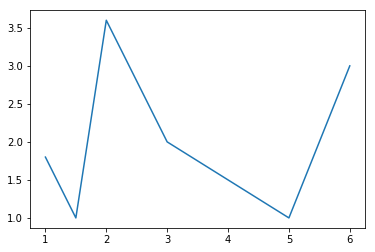

In [2]:
# X и Y - координаты точек
X = [1,   1.5, 2,   3, 5, 6]
Y = [1.8, 1,   3.6, 2, 1, 3]

plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.show()     # показываем, что получилось

Можем просто нарисовать точки - **scatterplot**. Кроме того, добавим нашему графику загловок и подписи осей:

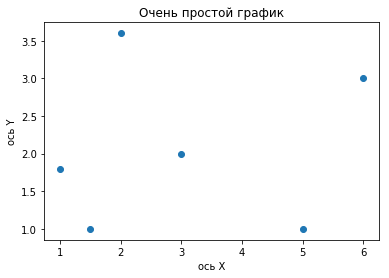

In [3]:
plt.scatter(X,Y)  # рисуем точки
plt.title('Очень простой график')  # добавляем заголовок
plt.ylabel('ось Y')  # подписи к осям
plt.xlabel('ось X')
plt.show()

С помощью `xlim` и `ylim` можно указать масштаб графика по оси X и Y:

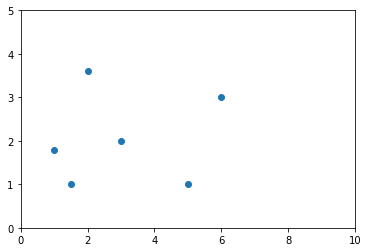

In [4]:
plt.scatter(X, Y)
plt.xlim(0,10)
plt.ylim(0,5)
plt.show()

Когда мы рисуем точки, кроме координат в `plt.scatter()` можно передать параметры:

* `s`: размер точки, по умолчанию 20;
* `c`: цвет, по умолчанию 'b' - голубой;
* `marker`: символ точки, по умолчанию 'o' - круглая точка.


Список цветов можно посмотреть [тут](https://matplotlib.org/examples/color/named_colors.html), а маркеров - [тут](https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html).

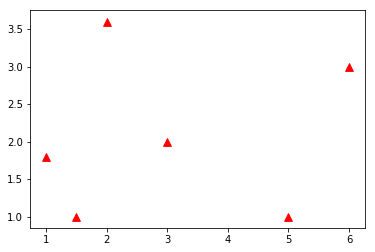

In [5]:
plt.scatter(X, Y, s=60, c='red', marker='^')
plt.show()

В качестве размера и цвета можно задавать массивы с соответствующими значениями:

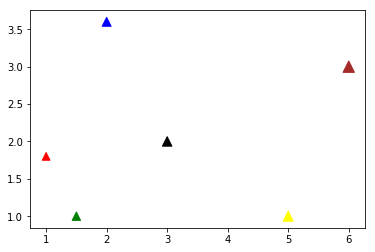

In [6]:
size = [60, 70, 80, 90, 100, 130]
colors = ['red', 'green', 'blue', 'black', 'yellow', 'brown']
plt.scatter(X, Y, s=size, c=colors, marker='^')
plt.show()

Естественно, любой график можно сохранить в виде картинки на ваш компьютер в одном из доступных форматов: emf, eps, pdf, png, ps, raw, rgba, svg, svgz.

In [7]:
plt.savefig('plot_with_colors.png')

## ggplot

Можно не задавать каждый параметр графика вручную, а использовать готовые стилевые шаблоны для графиков. Одним из популярных шаблонов является `ggplot`. 

Возьмем два набора точек - с координатами (X, Y) и (X2, Y2):

In [8]:
X2 = [i*2 for i in X]
Y2 = [i*1.5 for i in Y]
print(X, Y, X2, Y2)

[1, 1.5, 2, 3, 5, 6] [1.8, 1, 3.6, 2, 1, 3] [2, 3.0, 4, 6, 10, 12] [2.7, 1.5, 5.4, 3.0, 1.5, 4.5]


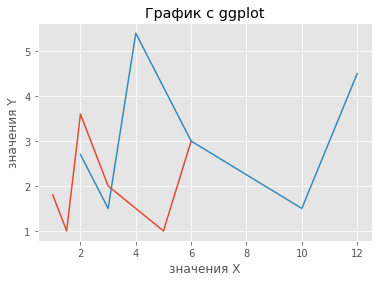

In [9]:
from matplotlib import style  # добавляем стили
style.use('ggplot')  # выбираем стиль ggplot

plt.plot(X,Y)
plt.plot(X2, Y2)

plt.title('График с ggplot')
plt.ylabel('значения Y')
plt.xlabel('значения X')

plt.show()

В `plot` так же как в `scatter` выше можно указывать разные параметры. Например, мы можем поменять цвет линии, ее ширину.  

Кроме того мы можем добавить в график легенду. Для этого каждой линии нужно приписать `label`, а затем нарисовать легенду с помощью `legend()`:

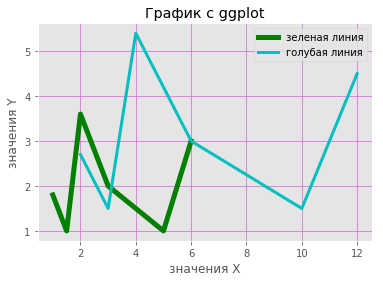

In [10]:
plt.plot(X, Y,'g',label='зеленая линия', linewidth=5)
plt.plot(X2, Y2,'c',label='голубая линия',linewidth=3)

plt.title('График с ggplot')
plt.ylabel('значения Y')
plt.xlabel('значения X')

plt.legend()

plt.grid(True,color='orchid')  # а еще можно менять вид сетки

plt.show()

Соберем новый набор данных:

In [11]:
X = [1, 2, 3, 4, 5]
Y = [11, 12, 13, 14, 15]

X2 = [6, 7, 8, 9, 10]
Y2 = [15, 14, 13, 12, 11]

Мы можем нарисовать __столбчатую диаграмму__:

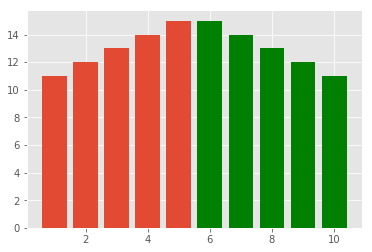

In [12]:
plt.bar(X, Y)
plt.bar(X2, Y2, color='g')
plt.show()

Ну и наконец, график лайков, комментариев, репостов Владимира Владимировича.

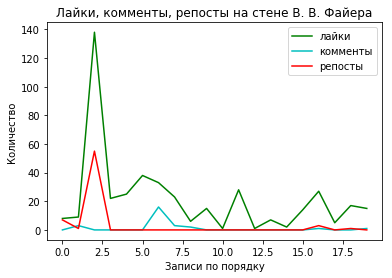

In [8]:
X = range(len(likes))

plt.plot(X, likes, 'g', label='лайки')
plt.plot(X, comments, 'c', label='комменты')
plt.plot(X, reposts, 'r', label='репосты')

plt.title('Лайки, комменты, репосты на стене В. В. Файера')
plt.ylabel('Количество')
plt.xlabel('Записи по порядку')
plt.legend()
plt.show()

## Пример

Помните [файл](https://github.com/elmiram/2016learnpython/blob/master/data/Genproc.csv) с твитами генпрокуратуры? Попробуем создать графики на этом датасете. 

### Сколько твитов было в каждый месяц в 2013 году?

In [15]:
from collections import Counter

with open('data/Genproc.csv', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    
dates = Counter([line.split()[1][5:7] for line in lines if '2013-' in line])
dates
dates = dict(dates)
dates

{'01': 460,
 '02': 503,
 '03': 377,
 '04': 435,
 '05': 337,
 '06': 347,
 '07': 438,
 '08': 207}

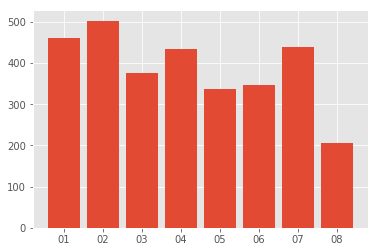

In [21]:
months_labels = sorted(dates.keys())
months = [i for i in range(len(months_labels))]

twit_nums = [dates[key] for key in months_labels]

plt.bar(months, twit_nums)
plt.xticks(months, months_labels)
plt.show()

### Сколько Твитов было в каждый час в аккаунте Генпрокуратуры и Сколково?

[Твиты сколково](https://github.com/elmiram/2016learnpython/blob/master/data/skolkovo_ru.csv)

[Твиты прокуратуры](https://github.com/elmiram/2016learnpython/blob/master/data/Genproc.csv)

In [22]:
hours = ['{:02}'.format(i) for i in range(24)]
print(hours)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


In [23]:
hours_genproc = Counter([line.split()[2][:2] for line in lines])
hours_genproc = [hours_genproc[hour] for hour in hours]
print(hours_genproc)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 62, 255, 534, 430, 372, 396, 420, 448, 276, 28, 3, 1, 0, 0, 0]


In [24]:
with open('data/skolkovo_ru.csv', 'r', encoding='utf-8') as f2:
    lines2 = f2.readlines()
    
hours_skolkovo = Counter([line.split()[2][:2] for line in lines2])
hours_skolkovo = [hours_skolkovo[hour] for hour in hours]
print(hours_skolkovo)

[7, 12, 0, 0, 0, 0, 0, 14, 13, 129, 158, 165, 319, 277, 207, 234, 293, 243, 211, 188, 66, 24, 10, 10]


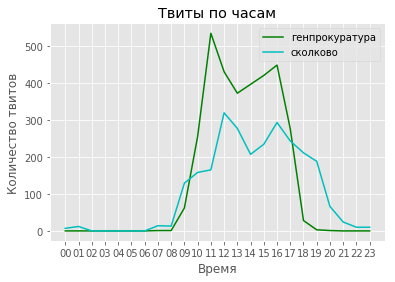

In [25]:
plt.plot(range(len(hours)), hours_genproc, 'g', label='генпрокуратура')
plt.plot(range(len(hours)), hours_skolkovo, 'c', label='сколково')

plt.title('Твиты по часам')
plt.ylabel('Количество твитов')
plt.xlabel('Время')
plt.xticks(range(len(hours)), hours)
plt.legend()
plt.show()

## Задания

1) Составьте список 10 аккаунтов, которые чаще всего ретвитил аккаунт Сколково. Ретвиты начинаются с RT, аккаунт автора указывается сразу после RT, например: `RT @sk_ru_live`. Наприсуйте столбчатую диаграмму, показывающую количество ретвитов из каждого найденного аккаунта.

2) Составьте график длины твитов аккаунта Сколоково (ретвиты не считать). На то же изображение добавьте такой же график, построенный по аккаунту генпрокуратуры.